## imoport pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## Load Data

In [2]:
## load data
df_settle_clendar_raw = pd.read_csv('data/seattle/calendar.csv')
df_settle_listings_raw = pd.read_csv('data/seattle/listings.csv')
df_settle_reviews_raw = pd.read_csv('data/seattle/reviews.csv')

df_boston_airbnb_calendar_raw = pd.read_csv('data/boston-airbnb-open-data/calendar.csv')
df_boston_airbnb_listings_raw = pd.read_csv('data/boston-airbnb-open-data/listings.csv')
df_boston_airbnb_reviews_raw = pd.read_csv('data/boston-airbnb-open-data/reviews.csv')

## Explore Data

### df_settle_clendar_raw

In [3]:
info_dic = {'Feature':pd.Series(['listing_id','date','available','price']),
            'Meaning':pd.Series(['清单id','日期','是否有效','价格']),
           }
df_settle_clendar_raw_info = pd.DataFrame(info_dic)
df_settle_clendar_raw_info

,Feature,Meaning
0,listing_id,清单id
1,date,日期
2,available,是否有效
3,price,价格


In [4]:
df_settle_clendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_settle_clendar_raw.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### df_settle_listings_raw

-   The table of df_seattle_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id||
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转||
|thumbnail_url|简介url||
|medium_url|视频url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [6]:
df_settle_listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_settle_listings_raw.loc[0]

id                                                                             241032
listing_url                                       https://www.airbnb.com/rooms/241032
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                                     Stylish Queen Anne Apartment
summary                                                                           NaN
space                               Make your self at home in this charming one-be...
description                         Make your self at home in this charming one-be...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

### df_settle_reviews_raw

In [8]:
df_settle_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [9]:
info_dic = {'Feature':pd.Series(['listing_id','id','date','reviewer_id','reviewer_name','comments']),
            'Meaning':pd.Series(['清单id','id','日期','审核人id','审核人名','备注']),
           }
df_settle_reviews_raw_info = pd.DataFrame(info_dic)
df_settle_reviews_raw_info

,Feature,Meaning
0,listing_id,清单id
1,id,id
2,date,日期
3,reviewer_id,审核人id
4,reviewer_name,审核人名
5,comments,备注


In [10]:
df_settle_reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Clean Up

In [11]:
## available settle
df_settle_clendar_raw.loc[df_settle_clendar_raw['available']=='t'].shape[0]/df_settle_clendar_raw.shape[0]

0.6706100160020666

67.061%处于可出租状态

In [12]:
# Error Data
na_price = df_settle_clendar_raw[pd.isna(df_settle_clendar_raw['price'])]
error = na_price.loc[na_price['available']=='t']

print ('There are {} error data'.format(error.shape[0]))

There are 0 error data


In [100]:
df_settle_clendar_raw['date'] = pd.to_datetime(df_settle_clendar_raw['date'])
df = df_settle_clendar_raw.set_index('date')

df['count'] = 1

df_t = df[df['available']=='t']
df_f = df[df['available']!='t']

df_t_period = df_t.resample('M').sum().to_period('M')
df_t_list = df_t_period.loc[:,['count']].head()
df_t_list

,count
date,
2016-01,59239
2016-02,73321
2016-03,83938
2016-04,76037
2016-05,79971


In [119]:
df_f_period = df_f.resample('M').sum().to_period('M')
df_f_list = df_f_period.loc[:,['count']]
s_f = pd.Series(df_f_list['count'],index=df_f_list.index)

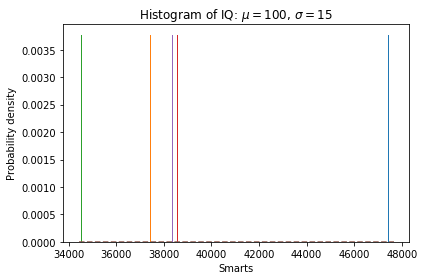

In [57]:
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(df_f_list, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [ ]:
merge_pd = df_settle_clendar_raw.dropna().merge(df_settle_listings_raw,left_on='listing_id',right_on='id',how='inner')
merge_pd

In [39]:
group_by_pd = merge_pd.groupby(['listing_id','available'])
group_by_pd.head()

,listing_id,date_x,available,price,id,date_y,reviewer_id,reviewer_name,comments
0,241032,2016-01-04,t,$85.00,682061.0,2011-11-01,479824.0,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,2016-01-04,t,$85.00,691712.0,2011-11-04,357699.0,Megan,Maija's apartment was a wonderful place to sta...
2,241032,2016-01-04,t,$85.00,702999.0,2011-11-08,1285567.0,Marylee,one of the most pleasant stays i've had in my ...
3,241032,2016-01-04,t,$85.00,717262.0,2011-11-14,647857.0,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,2016-01-04,t,$85.00,730226.0,2011-11-19,1389821.0,Franka,Our stay was short and pleasant. With its own ...
71622,953595,2016-01-04,t,$125.00,6643648.0,2013-08-19,7323285.0,Cherry,The reservation was canceled 33 days before ar...
71623,953595,2016-01-04,t,$125.00,6643745.0,2013-08-19,7557645.0,Georgianne,The reservation was canceled 38 days before ar...
71624,953595,2016-01-04,t,$125.00,8990789.0,2013-12-01,1586593.0,Jo Breen (Jody),This apartment in upper Queen Anne in Seattle ...
71625,953595,2016-01-04,t,$125.00,12389494.0,2014-05-01,1586593.0,Jo Breen (Jody),I have reviewed the Bright + Airy Queen Anne a...
71626,953595,2016-01-04,t,$125.00,17264483.0,2014-08-10,13647404.0,Brian,The Bright + Airy Queen Anne Apartment was per...
